#### chapter 4

In [77]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image',cmap='Greys')

In [3]:
path=untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/imtiaz/.fastai/data/mnist_sample')

In [4]:
Path.BASE_PATH=path

In [5]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes=(path/'train/3').ls().sorted()
sevens=(path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
img_path=threes[1]
img=Image.open(img_path)
img

In [11]:
array(img)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [12]:
tensor(img)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [21]:
img_t=tensor(img)
df=pd.DataFrame(img_t)
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [23]:
seven_tensors=[tensor(Image.open(o)) for o in sevens]
three_tensors=[tensor(Image.open(o)) for o in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

In [25]:
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_threes=torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [26]:
stacked_threes.ndim # to know the rank of a tensor same as len(stacked_threes.shape)

3

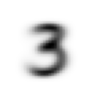

In [28]:
mean3=stacked_threes.mean(0)
show_image(mean3);

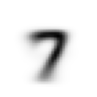

In [29]:
mean7=stacked_sevens.mean(0)
show_image(mean7);

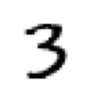

In [31]:
a_3=stacked_threes[1]
show_image(a_3);

In [33]:
dist_3_abs=(a_3-mean3).abs().mean()
dist_3_sqr=((a_3-mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [36]:
dist_7_abs=(a_3-mean7).abs().mean()
dist_7_sqr=((a_3-mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [37]:
F.l1_loss(a_3.float(),mean7),F.mse_loss(a_3.float(),mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [39]:
data=[[1,2,3],[4,5,6]]
arr=array(data)
tns=tensor(data)

In [40]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [42]:
tns[1]

tensor([4, 5, 6])

In [43]:
tns[:,1]

tensor([2, 5])

In [47]:
tns[1:,1:3]

tensor([[5, 6]])

In [49]:
tns.type()

'torch.LongTensor'

In [50]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [53]:
valid_3_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()]).float()/255
valid_7_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()]).float()/255

In [54]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [55]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [63]:
(a_3-mean3).abs().mean((-1)).mean(-1)

tensor(0.1114)

In [65]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [64]:
mean3.shape

torch.Size([28, 28])

In [66]:
valid_3_dist=mnist_distance(valid_3_tens,mean3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1488, 0.1145, 0.1158,  ..., 0.1129, 0.1419, 0.1669]),
 torch.Size([1010]))

In [67]:
tensor([1,2,3])+tensor(1)

tensor([2, 3, 4])

In [69]:
tensor([1,2,3]).shape,tensor(1).shape


(torch.Size([3]), torch.Size([]))

In [71]:
def is_3(x):return mnist_distance(x,mean3)<mnist_distance(x,mean7)
is_3(a_3)

tensor(True)

In [72]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [75]:
accuracy_3s=is_3(valid_3_tens).float().mean()
accuracy_7s=(1-is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s

(tensor(0.9168), tensor(0.9854))

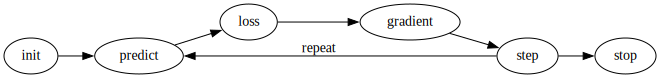

In [78]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

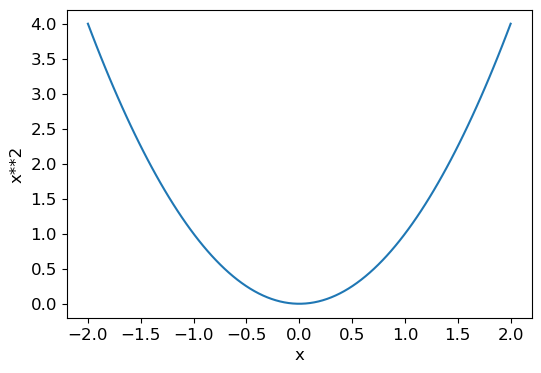

In [79]:
def f(x): return x**2
plot_function(f,'x','x**2')

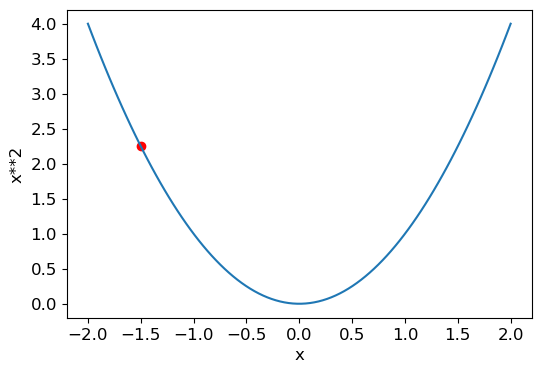

In [81]:
plot_function(f,'x','x**2')
plt.scatter(-1.5,f(-1.5),color='red')

In [88]:
xt=tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [89]:
yt=f(xt)

In [90]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [91]:
yt.backward()  # the thing on which you call backward , you get the partial derivative on that for example x.grad means dy/dx

In [92]:
xt.grad

tensor(6.)

In [96]:
xt=tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [98]:
def f(x):return (x**2).sum()

In [99]:
yt=f(xt)

In [100]:
yt.backward()  # the thing on which you call backward , you get the partial derivative on that for example x.grad means dy/dx

In [101]:
xt.grad

tensor([ 6.,  8., 20.])

In [124]:
time=torch.arange(20) ;time

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

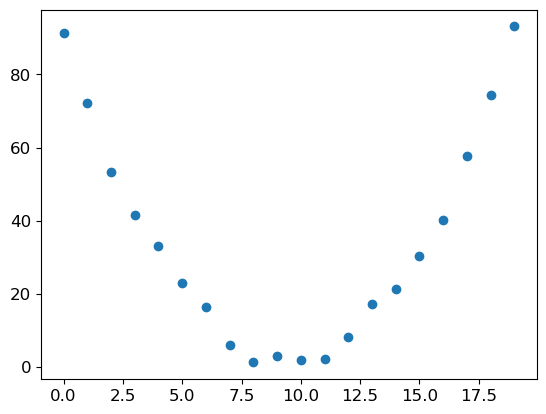

In [125]:
speed=torch.randn(20)*3 + (time-9.5)**2 + 1
plt.scatter(time,speed)

In [126]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + b*t + c

In [127]:
def mse(preds,targets):
    return ((preds-targets)**2).mean()

In [128]:
params=torch.randn(3).requires_grad_()

In [129]:
orig_params=params.clone()
orig_params

tensor([ 0.9912, -0.5672, -0.5706], grad_fn=<CloneBackward0>)

In [130]:
preds=f(time,params)
preds

tensor([-5.7065e-01, -1.4659e-01,  2.2599e+00,  6.6490e+00,  1.3020e+01,  2.1374e+01,  3.1711e+01,  4.4030e+01,  5.8331e+01,  7.4615e+01,  9.2881e+01,  1.1313e+02,  1.3536e+02,  1.5958e+02,
         1.8577e+02,  2.1395e+02,  2.4411e+02,  2.7626e+02,  3.1038e+02,  3.4649e+02], grad_fn=<AddBackward0>)

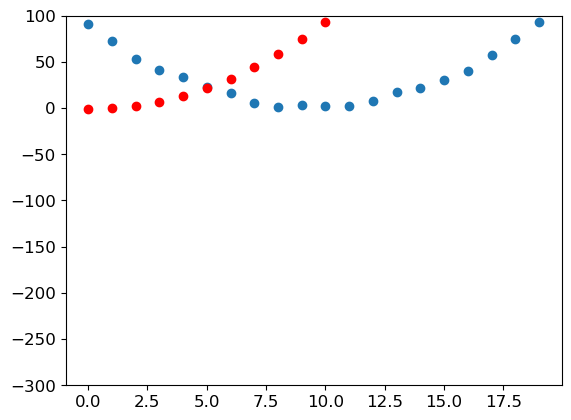

In [131]:
def show_preds(preds,ax=None):
    if ax is None : ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds),color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)

In [132]:
loss=mse(preds,speed)
loss

tensor(17758.2695, grad_fn=<MeanBackward0>)

In [133]:
loss.backward()
params.grad
params.grad* 1e-5
params

tensor([ 0.9912, -0.5672, -0.5706], requires_grad=True)

In [134]:
lr=1e-5
params.data-=lr*params.grad.data
params.grad=None

In [135]:
preds=f(time,params)

In [136]:
mse(preds,speed)

tensor(4265.5791, grad_fn=<MeanBackward0>)

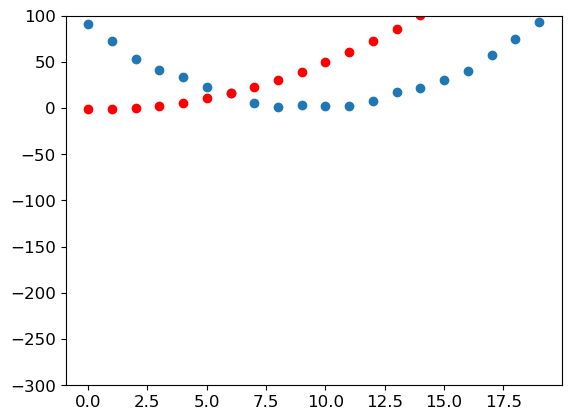

In [137]:
show_preds(preds)

In [138]:
def apply_step(params,prn=True):
    preds=f(time,params)
    loss=mse(preds,speed)
    loss.backward()
    params.data-=params.grad.data*1e-5
    params.grad=None
    if prn:
        print(loss.item())
    return preds

for i in range(10): apply_step(params)

4265.5791015625
1712.344482421875
1229.188232421875
1137.7545166015625
1120.446533203125
1117.1656494140625
1116.5389404296875
1116.41455078125
1116.385009765625
1116.373779296875


In [139]:
params=orig_params.detach().requires_grad_()

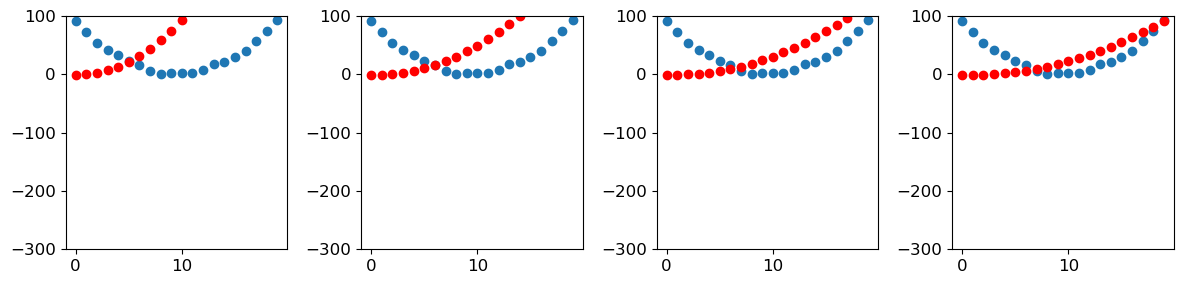

In [140]:
_,axs=plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params,False),ax)
plt.tight_layout()

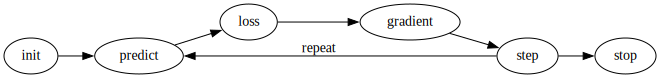

In [141]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [142]:
train_x=torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_x.shape

torch.Size([12396, 784])

In [144]:
train_y=tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [146]:
dset=list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

In [148]:
valid_x=torch.cat([valid_3_tens,valid_7_tens]).view(-1,28*28)
valid_y=tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens))
valid_x.shape,valid_y.shape
valid_dset=list(zip(valid_x,valid_y))

In [149]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()
weights=init_params((28*28,1))
bias=init_params(1)

In [155]:
train_x[0].shape,weights.shape,bias.shape

(torch.Size([784]), torch.Size([784, 1]), torch.Size([1]))

In [152]:
(train_x[0]*weights.T).sum()+bias

tensor([1.0061], grad_fn=<AddBackward0>)

In [153]:
(train_x[0]@weights).sum()+bias

tensor([1.0061], grad_fn=<AddBackward0>)

In [160]:
def linear1(xb): return xb@weights + bias
preds=linear1(train_x)
preds

tensor([[1.0061],
        [1.5329],
        [9.5779],
        ...,
        [6.2636],
        [6.9246],
        [8.8002]], grad_fn=<AddBackward0>)

In [161]:
corrects=(preds>0.0).float() == train_y
corrects.float().mean()

tensor(0.4837)

In [168]:
help(torch.where)

Help on built-in function where in module torch:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                              where :attr:`condition` is ``True``
        y (Tensor or Scalar): value (if :attr:`y` is a scalar) or values selected at indices
                              where :attr:`condition` is ``False``
    
    Returns:


In [172]:
trgts  = tensor([1.0,0.0,1.0])
prds   = tensor([0.9, 0.4, 0.2])

def mnist_loss(prds,trgts): return torch.where(trgts==1,1-prds,prds).mean()
mnist_loss(prds,trgts)

tensor(0.4333)

In [170]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [171]:
torch.where(trgts==1, 1-prds, prds).mean()

tensor(0.4333)

In [174]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts) # loss decreases here since we made the last value close to 1.

tensor(0.2333)

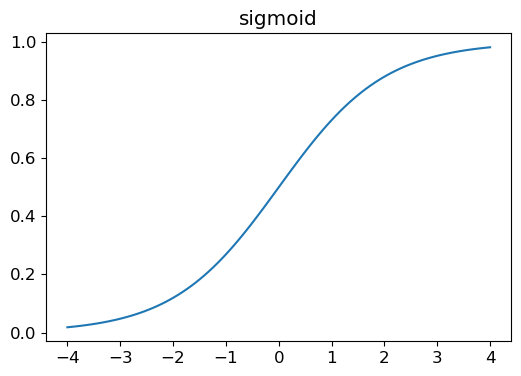

In [176]:
plot_function(torch.sigmoid,title='sigmoid',min=-4 , max=4)

In [177]:
def mnist_loss(prds,trgts):
    prds=torch.sigmoid(prds)
    return torch.where(trgts==1,1-prds,prds).mean()

mnist_loss(prds,trgts)

tensor(0.4460)

In [180]:
coll=range(15)
dl=DataLoader(coll,batch_size=5,shuffle=True)
list(dl)

[tensor([14,  9,  7,  0, 12]),
 tensor([ 6, 11,  4,  2,  8]),
 tensor([ 5,  3,  1, 13, 10])]

In [183]:
ds=L(enumerate(string.ascii_lowercase))

In [184]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [185]:
dl=DataLoader(ds,batch_size=6,shuffle=True)
list(dl)

[(tensor([20,  8,  2,  5, 12, 17]), ('u', 'i', 'c', 'f', 'm', 'r')),
 (tensor([19, 14, 15, 16, 11,  1]), ('t', 'o', 'p', 'q', 'l', 'b')),
 (tensor([23, 25,  0, 22,  6,  4]), ('x', 'z', 'a', 'w', 'g', 'e')),
 (tensor([ 3, 21, 24, 18,  9,  7]), ('d', 'v', 'y', 's', 'j', 'h')),
 (tensor([10, 13]), ('k', 'n'))]

In [186]:
# putting all concepts together here
weights=init_params((784,1))
bias=init_params(1)

In [187]:
dl=DataLoader(dset,batch_size=256)
xb,yb=first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [188]:
valid_dl=DataLoader(valid_dset,batch_size=256)

In [190]:
# lets create a minibatch of size 4 for testing
batch=train_x[:4]
batch.shape

torch.Size([4, 784])

In [202]:
preds=linear1(batch)
preds

tensor([[-10.7397],
        [ -7.6684],
        [ -6.3949],
        [ -9.8102]], grad_fn=<AddBackward0>)

In [194]:
loss=mnist_loss(preds,train_y[:4])
print(loss.item())
loss.backward()

0.9994472861289978


In [196]:
def calc_grad(xb,yb,model):
    preds=model(xb)
    loss=mnist_loss(preds,yb)
    loss.backward()

In [197]:
calc_grad(train_x[:4],train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0011]))

In [198]:
calc_grad(train_x[:4],train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0017]))

In [199]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [200]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data-=lr*p.grad.data
            p.grad.zero_()

In [203]:
(preds>0.0).float()==train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [208]:
def batch_accuracy(xb,yb):
    preds=xb.sigmoid()
    correct=(preds>0.5).float()==yb
    return correct.float().mean()

In [209]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [215]:
def validate_epoch(model):
    accs=[batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [216]:
validate_epoch(linear1)

0.4856

In [217]:
lr=1.
params=weights,bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.6618

In [218]:
for i in range(20):
    train_epoch(linear1,lr,params)
    print(validate_epoch(linear1),end=' ')

0.8487 0.8992 0.9239 0.9332 0.9398 0.9451 0.949 0.95 0.9523 0.9533 0.9538 0.9558 0.9571 0.9576 0.958 0.959 0.9595 0.96 0.96 0.9605 

In [219]:
linear_model=nn.Linear(28*28,1)
w,b=linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [222]:
class BasicOptim:
    def __init__(self,params,lr):self.params,self.lr=list(params),lr
    def step(self,*args,**kwargs):
        for p in self.params : p.data-=self.lr * p.grad.data
    def zero_grad(self,*args,**kwargs):
        for p in self.params:p.grad=None
        

In [223]:
opt=BasicOptim(linear_model.parameters(),lr)

In [226]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [227]:
validate_epoch(linear_model)

0.4557

In [228]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(linear_model),end=' ')
        
train_model(linear_model,20)

0.4932 0.8124 0.8343 0.9019 0.9218 0.9356 0.9442 0.9513 0.9532 0.9562 0.958 0.9599 0.9624 0.9628 0.9638 0.9647 0.9652 0.9652 0.9661 0.9665 

In [230]:
#fastai provides sgd class which we can use instead of basicoptim class
linear_model=nn.Linear(28*28,1)
opt=SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4932 0.8713 0.8147 0.9 0.9213 0.9341 0.9432 0.9494 0.9532 0.9547 0.9566 0.9585 0.9604 0.9628 0.9633 0.9643 0.9652 0.9656 0.9656 0.9665 

In [231]:
dls=DataLoaders(dl,valid_dl)

In [232]:
learn=Learner(dls,nn.Linear(28*28,1),opt_func=SGD,
             loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637270,0.503604,0.495584,00:00
1,0.581539,0.136668,0.903781,00:00
2,0.210858,0.217600,0.793939,00:00
3,0.091087,0.126149,0.895654,00:00
4,0.047027,0.093382,0.919437,00:00
5,0.029922,0.076464,0.932363,00:00
6,0.022947,0.066118,0.941962,00:00
7,0.019895,0.059334,0.949706,00:00
8,0.018384,0.054634,0.953033,00:00
9,0.017498,0.051208,0.954996,00:00


In [233]:
def simple_net(xb):
    res=xb@w1 + b1
    res=res.max(tensor(0.0))
    res=res@w2+b2
    return res

In [237]:
test=(torch.randn(3)+0.3)
print(test)
test.max(tensor(0.0)) # replace all negative numbers with zero which is called rectified linear unit.

tensor([-0.4169,  0.8315, -1.2288])


tensor([0.0000, 0.8315, 0.0000])

In [238]:
w1=init_params(28*28,30)
b1=init_params(30)
w2=init_params(30,1)
b2=init_params(1)

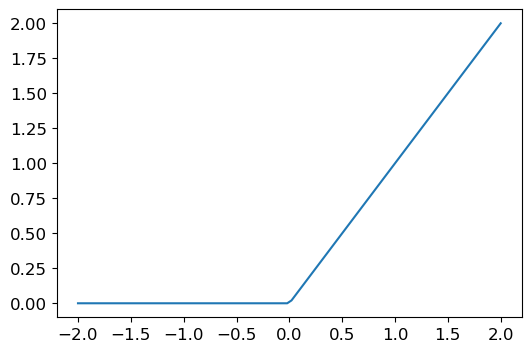

In [239]:
plot_function(F.relu)

In [241]:
simple_net=nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1))

simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [242]:
learn=Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.322542,0.419942,0.504853,00:00
1,0.151283,0.241077,0.787828,00:00
2,0.083414,0.127580,0.903398,00:00
3,0.054581,0.090128,0.927180,00:00
4,0.041232,0.073103,0.942069,00:00
5,0.034423,0.063516,0.951615,00:00
6,0.030519,0.057461,0.953087,00:00
7,0.027989,0.053332,0.954505,00:00
8,0.026167,0.050336,0.955923,00:00
9,0.024758,0.048051,0.957342,00:00


In [245]:
L(learn.recorder.values).itemgot(2)

(#40) [0.5048531293869019,0.7878281474113464,0.9033979177474976,0.9271804690361023,0.942069411277771,0.9516146183013916,0.9530866742134094,0.9545050263404846,0.9559233784675598,0.957341730594635...]

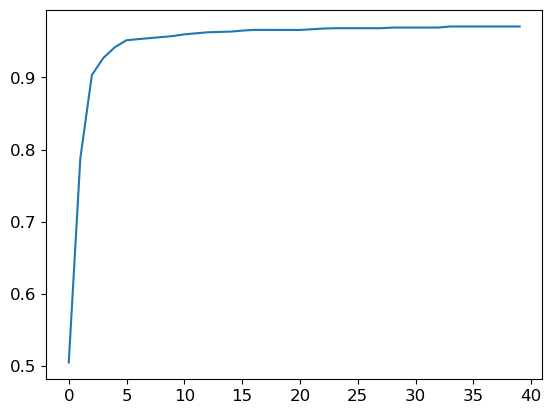

In [246]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [247]:
learn.recorder.values[-1][2]

0.970651388168335

In [250]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.122703,0.021180,0.995093,00:08


#### chapter 5

In [18]:
from fastai.vision.all import *
from fastbook import *
path=untar_data(URLs.PETS)
path

Path('.')

In [2]:
Path.BASE_PATH=path

In [3]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [4]:
(path/'images').ls()

(#7393) [Path('images/Birman_115.jpg'),Path('images/leonberger_142.jpg'),Path('images/Bombay_68.jpg'),Path('images/japanese_chin_26.jpg'),Path('images/saint_bernard_149.jpg'),Path('images/Ragdoll_41.jpg'),Path('images/japanese_chin_32.jpg'),Path('images/Ragdoll_68.jpg'),Path('images/Persian_202.jpg'),Path('images/scottish_terrier_143.jpg')...]

In [5]:
fname=(path/'images').ls()[0]
fname

Path('images/Birman_115.jpg')

In [6]:
fname.name

'Birman_115.jpg'

In [7]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['Birman']

In [8]:
pets=DataBlock(
              blocks=(ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224,min_scale=0.75))

dls=pets.dataloaders(path/'images')

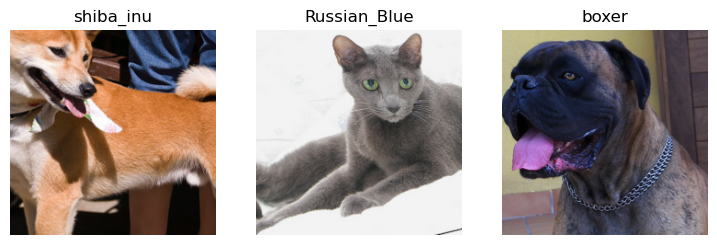

In [9]:
dls.show_batch(nrows=1,ncols=3)

In [10]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/imtiaz/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/imtiaz/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying partial gives
      newfoundland
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(27)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(27))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

In [11]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.508511,0.308830,0.110284,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.501993,0.286218,0.095399,00:35
1,0.316902,0.217901,0.066982,00:34


In [12]:
x,y=dls.one_batch()

In [13]:
y

TensorCategory([30,  5,  6, 15, 35, 23, 34, 33, 28, 24,  2, 32,  0, 25,  1, 25,
                21, 10, 19, 20, 28, 28, 17, 15, 17,  6, 36,  3,  9,  6,  4, 36,
                 2, 20, 16,  0, 21, 17, 27, 14, 32, 14,  6, 29, 22, 35, 10, 17,
                 6,  1, 26, 19, 20, 31,  8,  2, 17, 28, 11, 25, 21, 11,  9, 33],
               device='cuda:0')

In [14]:
preds,_=learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([3.2168e-04, 1.6719e-04, 1.2280e-03, 2.6557e-04, 2.6241e-03,
            1.5774e-03, 4.4456e-04, 9.5489e-04, 2.5789e-03, 1.5124e-03,
            3.6692e-04, 5.1384e-05, 1.7216e-02, 2.4271e-03, 5.6762e-03,
            7.6929e-04, 4.5871e-04, 8.1661e-05, 1.1879e-02, 5.8773e-03,
            3.6528e-04, 2.3737e-02, 4.5778e-02, 3.6332e-02, 3.2738e-03,
            4.8344e-04, 2.4712e-04, 5.2072e-02, 1.3246e-04, 1.1436e-03,
            7.3560e-01, 1.3168e-02, 1.0835e-03, 4.3570e-04, 2.4487e-02,
            4.5099e-03, 6.7311e-04])

In [15]:
len(preds[0]),preds[0].sum()

(37, TensorBase(1.0000))

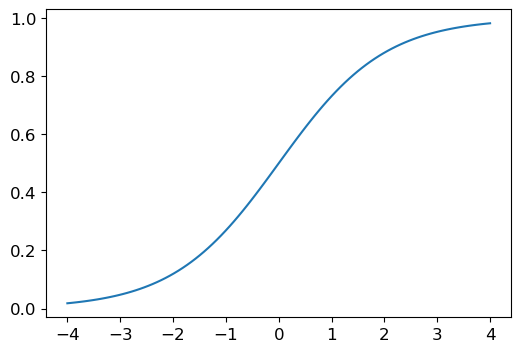

In [19]:
plot_function(torch.sigmoid,min=-4 , max=4)

In [20]:
torch.random.manual_seed(42);

In [21]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [22]:
sm_acts=torch.softmax(acts,dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [23]:
targ=tensor([0,1,0,1,1,0])

In [24]:
idx=range(6)
sm_acts[idx,targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [25]:
F.nll_loss(sm_acts,targ,reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [26]:
-torch.log(sm_acts[idx,targ])

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [27]:
F.nll_loss(torch.log(sm_acts),targ,reduction='none')

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [28]:
loss_func=nn.CrossEntropyLoss()
loss_func(acts,targ)

tensor(1.8045)

In [29]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

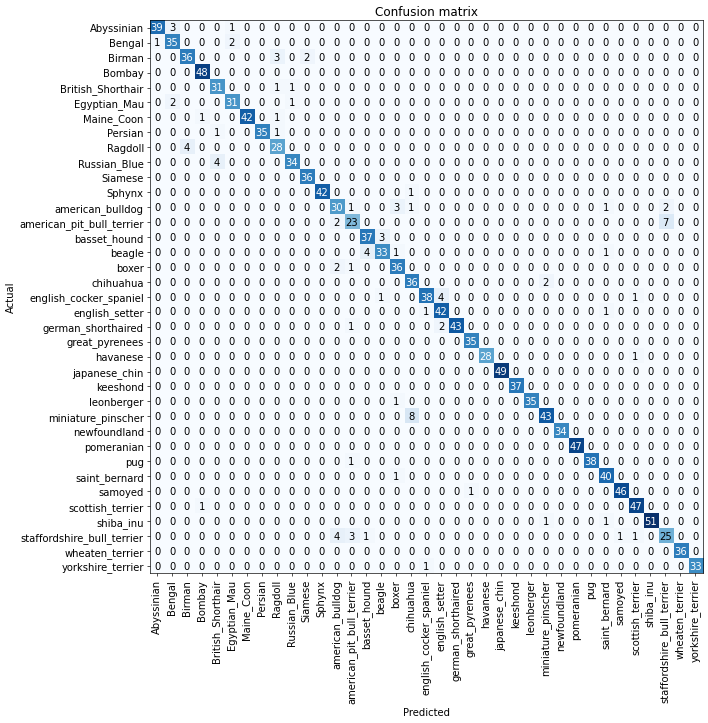

In [30]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [31]:
interp.most_confused(min_val=5)

[('miniature_pinscher', 'chihuahua', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7)]

In [32]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1,base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.651703,3.700450,0.393099,00:33


epoch,train_loss,valid_loss,error_rate,time
0,2.837372,1.227462,0.359946,00:42


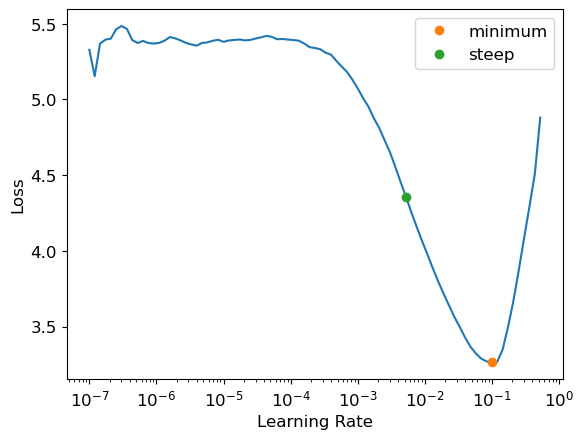

In [33]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [34]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [35]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)
# finetune method fits one epoch by freezing the layers only unfreezing the last random layers
# then it unfreezes all the layers and trains on rest of the epochs

epoch,train_loss,valid_loss,error_rate,time
0,1.339910,0.333948,0.110284,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.545827,0.363487,0.118403,00:42
1,0.346069,0.218143,0.073072,00:42


In [36]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

# fit one cycle only unfreezes the last random layers

epoch,train_loss,valid_loss,error_rate,time
0,1.123720,0.297610,0.091340,00:34
1,0.523464,0.236508,0.079161,00:32
2,0.338846,0.216871,0.074425,00:33


In [37]:
learn.unfreeze()

SuggestedLRs(valley=3.630780702224001e-05)

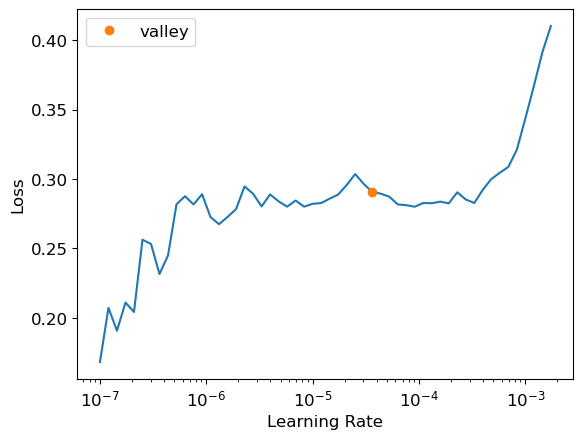

In [38]:
learn.lr_find()

In [39]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.265948,0.201336,0.064953,00:42
1,0.245408,0.187346,0.060217,00:42
2,0.230235,0.185785,0.056157,00:42
3,0.206819,0.185120,0.060893,00:42
4,0.190472,0.178213,0.053451,00:42
5,0.182070,0.182041,0.056157,00:42


In [40]:
# discriminative learning rates
#use a lower learning rate for the early layers of the neural network, 
#and a higher learning rate for the later layers (and especially the randomly added layers).

In [42]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4)) # we use a slice object here to determine the discriminative learning rates here.

epoch,train_loss,valid_loss,error_rate,time
0,1.148053,0.326057,0.107578,00:33
1,0.537868,0.231983,0.075101,00:34
2,0.343727,0.200906,0.067659,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.266865,0.194237,0.064276,00:42
1,0.242516,0.189825,0.066306,00:42
2,0.244193,0.182289,0.062923,00:42
3,0.213350,0.177111,0.061570,00:43
4,0.191212,0.179560,0.057510,00:43
5,0.177291,0.177307,0.058863,00:42
6,0.170399,0.176677,0.056834,00:42
7,0.142619,0.173799,0.056834,00:42
8,0.140085,0.173054,0.055480,00:42
9,0.134842,0.173174,0.053451,00:42


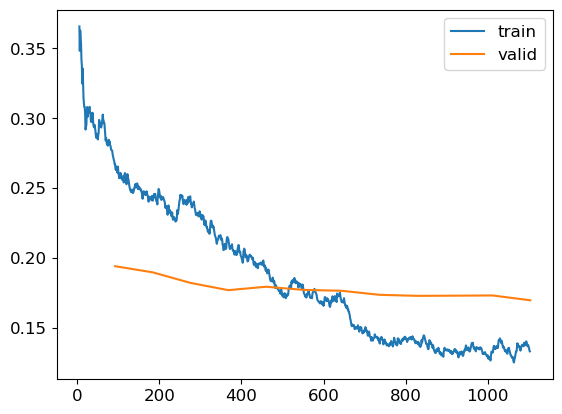

In [43]:
learn.recorder.plot_loss()

In [44]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3) # train for 3 epochs the last random layers and then unfreeze for the remaining layers.

/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/imtiaz/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.291031,0.258020,0.081191,00:46
1,0.586747,0.268781,0.084574,00:46
2,0.427013,0.257232,0.080514,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.270140,0.245072,0.080514,00:58
1,0.310623,0.310137,0.092693,00:58
2,0.269964,0.277360,0.080514,00:57
3,0.145336,0.198507,0.060217,00:57
4,0.094342,0.181296,0.052774,00:57
5,0.050220,0.167542,0.047361,00:57


#### chapter 6

In [1]:
from fastai.vision.all import *
path=untar_data(URLs.PASCAL_2007)

In [2]:
df=pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
df.iloc[:,0]

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [4]:
df.iloc[0]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [5]:
df.labels.value_counts()

person                                                408
car                                                   376
bird                                                  293
cat                                                   242
dog                                                   234
                                                     ... 
boat pottedplant chair diningtable person sofa dog      1
bottle diningtable person chair                         1
car bird                                                1
car person dog bus                                      1
sofa bottle person pottedplant                          1
Name: labels, Length: 473, dtype: int64

In [6]:
df.shape

(5011, 3)

In [7]:
dblock=DataBlock()

In [8]:
dsets=dblock.datasets(df)

In [9]:
len(dsets.train),len(dsets.valid)

(4009, 1002)

In [10]:
x,y = dsets.train[0]
x,y

(fname       004391.jpg
 labels       aeroplane
 is_valid         False
 Name: 2212, dtype: object,
 fname       004391.jpg
 labels       aeroplane
 is_valid         False
 Name: 2212, dtype: object)

In [11]:
x['fname']

'004391.jpg'

In [12]:
dblock=DataBlock(get_x=lambda r : r['fname'],get_y=lambda r : r['labels'])
dsets=dblock.datasets(df)
dsets.train[0]

('009213.jpg', 'car')

In [13]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']

In [14]:
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

('003147.jpg', 'dog person')

In [15]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(" ")
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(Path('/home/imtiaz/.fastai/data/pascal_2007/train/005508.jpg'),
 ['person', 'chair'])

In [16]:
dblock=DataBlock(blocks=[ImageBlock,MultiCategoryBlock],
                get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
                      0., 0., 0., 0., 0.]))

In [17]:
idxs=torch.where(dsets.train[0][1]==1.)[0]
idxs

TensorMultiCategory([14])

In [18]:
dsets.train.vocab[idxs]

(#1) ['person']

In [19]:
dsets.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [20]:
def splitter(df):
    train=df.index[~df.is_valid].tolist()
    valid=df.index[df.is_valid].tolist()
    return train,valid

dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=splitter,
                get_x=get_x,
                get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

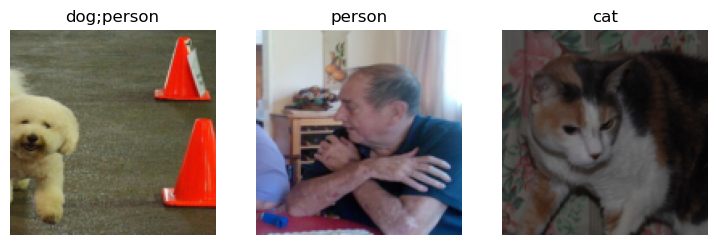

In [21]:
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=splitter,
                get_x=get_x,
                get_y=get_y,
                item_tfms=RandomResizedCrop(128,min_scale=0.35))
dls=dblock.dataloaders(df)
dls.show_batch(nrows=1,ncols=3)

In [26]:
learn=vision_learner(dls,resnet18)

In [23]:
x,y=to_cpu(dls.train.one_batch())

In [24]:
activs=learn.model(x)
activs.shape

torch.Size([64, 20])

In [25]:
def binary_cross_entropy(inputs,targets):
    inputs=inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

In [28]:
learn=vision_learner(dls,resnet50,metrics=partial(accuracy_multi,thresh=0.2))
learn.fine_tune(3, base_lr=3e-3,freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.948512,0.704240,0.227749,00:16
1,0.825936,0.566279,0.283446,00:10
2,0.610322,0.205575,0.814203,00:10
3,0.361447,0.125391,0.939422,00:10


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.134259,0.117885,0.946912,00:14
1,0.117909,0.105840,0.951016,00:13
2,0.097928,0.103081,0.953068,00:13


In [29]:
learn.metrics=partial(accuracy_multi,thresh=0.1)
learn.validate()

(#2) [0.10308129340410233,0.9326894283294678]

In [30]:
learn.metrics = partial(accuracy_multi, thresh=0.99)
learn.validate()

(#2) [0.10308129340410233,0.944183349609375]

In [31]:
preds,targs = learn.get_preds()

In [32]:
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

TensorBase(0.9573)

In [33]:
xs=torch.linspace(0.05, 0.95,29)
xs

tensor([0.0500, 0.0821, 0.1143, 0.1464, 0.1786, 0.2107, 0.2429, 0.2750, 0.3071,
        0.3393, 0.3714, 0.4036, 0.4357, 0.4679, 0.5000, 0.5321, 0.5643, 0.5964,
        0.6286, 0.6607, 0.6929, 0.7250, 0.7571, 0.7893, 0.8214, 0.8536, 0.8857,
        0.9179, 0.9500])

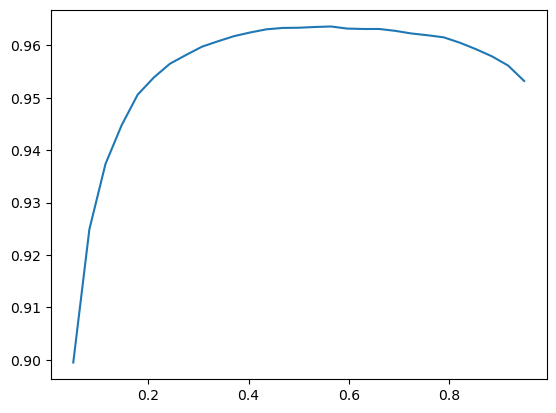

In [35]:
accs=[accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [36]:
accuracy_multi(preds, targs, thresh=0.5, sigmoid=False)

TensorBase(0.9634)

In [37]:
path=untar_data(URLs.BIWI_HEAD_POSE)
path

Path('/home/imtiaz/.fastai/data/biwi_head_pose')

In [38]:
Path.BASE_PATH=path

In [39]:
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj')...]

In [40]:
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt')...]

In [41]:
img_files=get_image_files(path)
img_files

(#15678) [Path('20/frame_00439_rgb.jpg'),Path('20/frame_00154_rgb.jpg'),Path('20/frame_00034_rgb.jpg'),Path('20/frame_00357_rgb.jpg'),Path('20/frame_00323_rgb.jpg'),Path('20/frame_00373_rgb.jpg'),Path('20/frame_00577_rgb.jpg'),Path('20/frame_00227_rgb.jpg'),Path('20/frame_00334_rgb.jpg'),Path('20/frame_00191_rgb.jpg')...]

In [43]:
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('20/frame_00439_pose.txt')

In [44]:
im=PILImage.create(img_files[0])
im.shape

(480, 640)

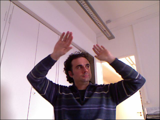

In [45]:
im.to_thumb(160)

In [47]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [48]:
get_ctr(img_files[0])

tensor([352.7322, 274.9907])

In [56]:
Counter([i.parent.name for i in img_files])

Counter({'20': 556,
         '06': 542,
         '07': 745,
         '15': 654,
         '24': 492,
         '12': 732,
         '14': 797,
         '02': 511,
         '05': 946,
         '11': 572,
         '04': 744,
         '01': 499,
         '16': 914,
         '03': 730,
         '09': 882,
         '08': 772,
         '13': 485,
         '21': 634,
         '23': 569,
         '19': 502,
         '10': 726,
         '17': 395,
         '22': 665,
         '18': 614})

In [57]:
biwi=DataBlock(blocks=(ImageBlock,PointBlock),
               get_items=get_image_files,
               get_y=get_ctr,
               splitter=FuncSplitter(lambda o:o.parent.name=='13'),
               batch_tfms=aug_transforms(size=(240,320)),
              )

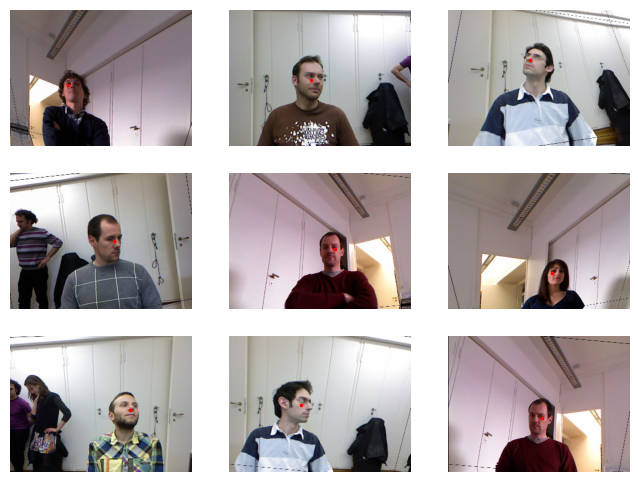

In [58]:
dls=biwi.dataloaders(path)
dls.show_batch(max_n=9,figsize=(8,6))

In [59]:
xb,yb=dls.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [60]:
yb[0]

TensorPoint([[0.4149, 0.2514]], device='cuda:0')

In [62]:
learn=vision_learner(dls,resnet18,y_range=(-1,1))

In [73]:
def sigmoid_range(x, lo, hi): return torch.sigmoid(x) * (hi-lo) + lo

In [68]:
from fastbook import *

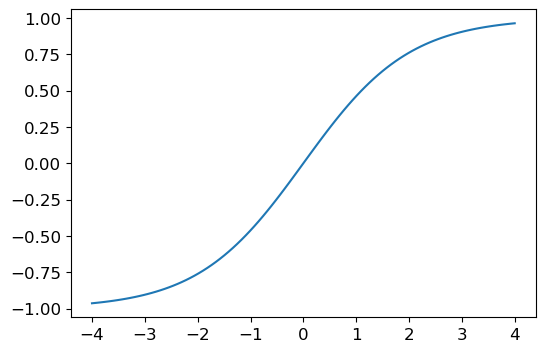

In [75]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4, max=4)

In [76]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.002511886414140463)

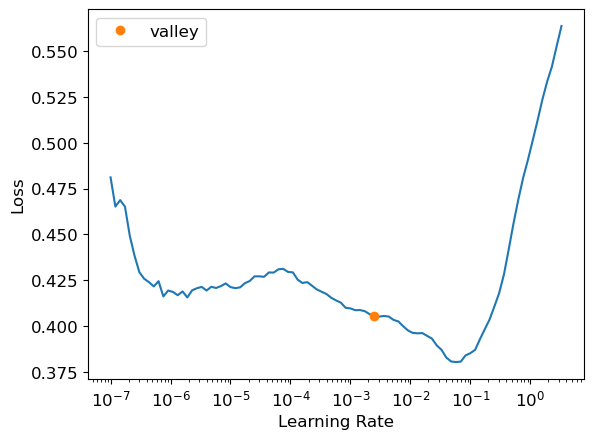

In [77]:
learn.lr_find()

In [79]:
lr=1e-2
learn.fine_tune(3,lr)

epoch,train_loss,valid_loss,time
0,0.047924,0.004732,01:11


epoch,train_loss,valid_loss,time
0,0.007835,0.001518,01:24
1,0.003206,0.000295,01:23
2,0.001352,0.000167,01:23


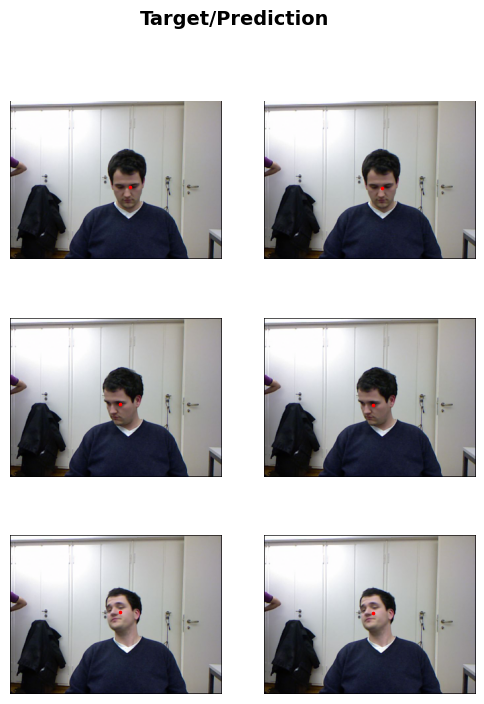

In [80]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

#### chapter 7

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *

In [4]:
path=untar_data(URLs.IMAGENETTE)

In [4]:
dblock=DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224,min_scale=0.75)
                )

dls=dblock.dataloaders(path,bs=64)

In [5]:
model=xresnet50(n_out=dls.c)
learn=Learner(dls,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.576127,2.029264,0.442494,02:35
1,1.176286,1.481645,0.537715,02:06
2,0.901535,1.170931,0.648245,02:18
3,0.725572,0.681423,0.787901,02:23
4,0.575532,0.583842,0.817028,02:04


In [6]:
x,y = dls.one_batch()
print(x.shape,y.shape)
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

torch.Size([64, 3, 224, 224]) torch.Size([64])


(TensorImage([0.4715, 0.4687, 0.4518], device='cuda:0'),
 TensorImage([0.2844, 0.2813, 0.3006], device='cuda:0'))

In [7]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [5]:
def get_dls(size,bs):
    dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                    get_items=get_image_files,
                    get_y=parent_label,
                    item_tfms=Resize(460),
                    batch_tfms=[*aug_transforms(size=size,min_scale=0.75),Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path, bs=bs)

In [12]:
dls=get_dls(224,64)

In [14]:
x,y=dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([0.0320, 0.0830, 0.1683], device='cuda:0'),
 TensorImage([1.2853, 1.3009, 1.3595], device='cuda:0'))

In [15]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.589091,3.061851,0.353622,02:08
1,1.246278,1.560744,0.523898,02:05
2,0.965294,1.247729,0.617252,02:05
3,0.709455,0.622415,0.809559,02:05
4,0.572579,0.568381,0.822629,02:05


In [1]:
# progressive resizing: Gradually using larger and larger images as you train.

In [6]:
dls = get_dls(128, 128)
learn = Learner(dls, xresnet50(n_out=dls.c), loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.633223,2.258802,0.366318,02:05
1,1.247352,1.215677,0.611277,01:25
2,0.936793,0.904598,0.703883,00:59
3,0.724862,0.677016,0.787528,00:56


In [7]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.929021,0.972836,0.695295,01:27


epoch,train_loss,valid_loss,accuracy,time
0,0.789975,0.753832,0.756161,01:28
1,0.773377,0.787723,0.754668,01:20
2,0.744372,0.727609,0.769978,01:19
3,0.682851,0.663589,0.791262,00:57
4,0.638330,0.650033,0.799477,00:54


In [8]:
#test time augmentation (TTA): During inference or validation, creating multiple versions of each image,
#using data augmentation,and then taking the average or maximum of the predictions for each augmented 
#version of the image.
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.8177744746208191

Mixup works as follows, for each image:

1. Select another image from your dataset at random.
1. Pick a weight at random.
1. Take a weighted average (using the weight from step 2) of the selected image with your image; this will be your independent variable.
1. Take a weighted average (with the same weight) of this image's labels with your image's labels; this will be your dependent variable.

In pseudocode, we're doing this (where `t` is the weight for our weighted average):

```
image2,target2 = dataset[randint(0,len(dataset)]
t = random_float(0.5,1.0)
new_image = t * image1 + (1-t) * image2
new_target = t * target1 + (1-t) * target2
```

In [ ]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=MixUp())
learn.fit_one_cycle(5, 3e-3)

we could replace all our 1s with a number a bit less than 1, and our 0s by a number a bit more than 0, and then train. This is called label smoothing. By encouraging your model to be less confident, label smoothing will make your training more robust, even if there is mislabeled data. The result will be a model that generalizes better.

#### chapter 8

collaborative filtering, which works like this: look at what products the current user has used or liked, find other users that have used or liked similar products, and then recommend other products that those users have used or liked.

In [1]:
from fastai.collab import *
from fastai.tabular.all import *
path=untar_data(URLs.ML_100k)

In [2]:
ratings=pd.read_csv(path/'u.data',delimiter='\t',header=None,names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
movies=pd.read_csv(path/'u.item',delimiter='|',encoding='latin-1',usecols=(0,1),names=['movie','title'],header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
ratings=ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


We can then build a DataLoaders object from this table. By default, it takes the first column for the user, the second column for the item (here our movies), and the third column for the ratings. We need to change the value of item_name in our case to use the titles instead of the IDs:

In [5]:
dls=CollabDataLoaders.from_df(ratings,item_name='title',bs=64)
dls.show_batch()

,user,title,rating
0,828,Angels and Insects (1995),2
1,214,"Clockwork Orange, A (1971)",5
2,881,2001: A Space Odyssey (1968),4
3,796,Sleepers (1996),4
4,537,"Ref, The (1994)",2
5,91,"Beautician and the Beast, The (1997)",2
6,311,Star Trek: First Contact (1996),4
7,537,Aladdin (1992),1
8,807,Homeward Bound: The Incredible Journey (1993),3
9,731,Hamlet (1996),4


In [6]:
dls.classes

{'user': ['#na#', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [7]:
n_users=len(dls.classes['user'])
n_movies=len(dls.classes['title'])
n_factors=5
user_factors=torch.randn(n_users,n_factors)
movie_factors=torch.randn(n_movies,n_factors)

In [8]:
n_users

944

In [9]:
one_hot_3=one_hot(3,n_users).float()
one_hot_3.shape

torch.Size([944])

In [10]:
user_factors.shape

torch.Size([944, 5])

In [11]:
user_factors.T @ one_hot_3

tensor([-0.5460,  1.1166,  0.6658, -0.2406,  0.4214])

In [12]:
user_factors[3]

tensor([-0.5460,  1.1166,  0.6658, -0.2406,  0.4214])

In [13]:
#Embedding: Multiplying by a one-hot-encoded matrix, using the computational shortcut that it can be
#implemented by simply indexing directly.
#This is quite a fancy word for a very simple concept. The thing that you multiply the one-hot-encoded matrix 
#by (or, using the computational shortcut, index into directly) is called the embedding matrix.

In [22]:
class DotProduct(Module):
    def __init__(self,n_users,n_movies,n_factors):
        self.user_factors=Embedding(n_users,n_factors)
        self.movie_factors=Embedding(n_movies,n_factors)
    def forward(self,x):
        users=self.user_factors(x[:,0])
        movies=self.movie_factors(x[:,1])
        return (users*movies).sum(dim=1)

In [15]:
x,y=dls.one_batch()
x.shape,y.shape

(torch.Size([64, 2]), torch.Size([64, 1]))

In [16]:
model=DotProduct(n_users,n_movies,50)
learn=Learner(dls,model,loss_func=MSELossFlat())

In [18]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,1.348868,1.298919,00:06
1,1.091621,1.117399,00:06
2,0.945476,0.999571,00:06
3,0.834635,0.905893,00:06
4,0.779559,0.889034,00:06


In [30]:
class DotProductBias(Module):
    def __init__(self,n_users,n_movies,n_factors,y_range=(0,5.5)):
        self.user_factors=Embedding(n_users,n_factors)
        self.user_bias=Embedding(n_users,1)
        self.movie_factors=Embedding(n_movies,n_factors)
        self.movie_bias=Embedding(n_movies,1)
        self.y_range=y_range
        
    def forward(self,x):
        users=self.user_factors(x[:,0])
        movies=self.movie_factors(x[:,1])
        res=(users*movies).sum(dim=1,keepdim=True)
        res+=self.user_bias(x[:,0])+self.movie_bias(x[:,1])
        return sigmoid_range(res,*self.y_range)

In [31]:
model=DotProductBias(n_users,n_movies,50)
learn=Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.928820,0.949746,00:07
1,0.847298,0.864107,00:07
2,0.594831,0.866034,00:06
3,0.399384,0.887667,00:06
4,0.290850,0.893340,00:06


Weight decay, or L2 regularization, consists in adding to your loss function the sum of all the weights squared. Why do that? Because when we compute the gradients, it will add a contribution to them that will encourage the weights to be as small as possible.

Why would it prevent overfitting? The idea is that the larger the coefficients are, the sharper canyons we will have in the loss function. If we take the basic example of a parabola, `y = a * (x**2)`, the larger `a` is, the more *narrow* the parabola is (<<parabolas>>).

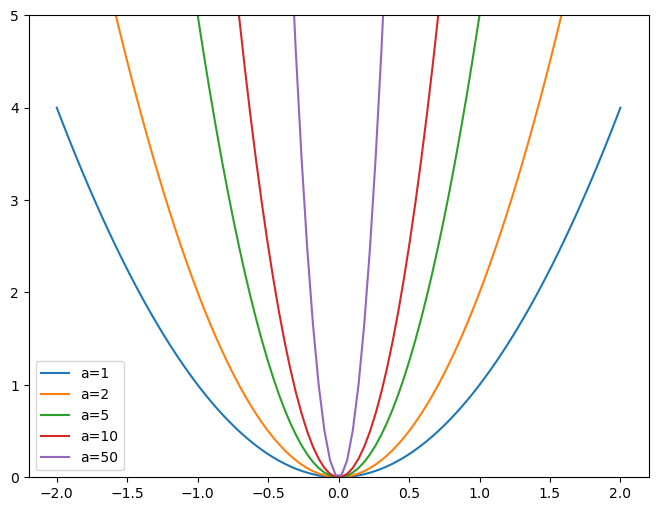

In [32]:
#hide_input
#id parabolas
x = np.linspace(-2,2,100)
a_s = [1,2,5,10,50] 
ys = [a * x**2 for a in a_s]
_,ax = plt.subplots(figsize=(8,6))
for a,y in zip(a_s,ys): ax.plot(x,y, label=f'a={a}')
ax.set_ylim([0,5])
ax.legend();

In [33]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.975463,0.961970,00:07
1,0.868124,0.883882,00:06
2,0.749595,0.835857,00:06
3,0.576055,0.821832,00:06
4,0.480852,0.821667,00:06


In [34]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [35]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

In [36]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.952174,0.948929,00:07
1,0.858317,0.886186,00:07
2,0.729109,0.837039,00:07
3,0.568280,0.824941,00:07
4,0.495687,0.824254,00:07


In [46]:
movie_bias=learn.model.movie_bias
idxs=movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Robocop 3 (1993)',
 'Leave It to Beaver (1997)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Cable Guy, The (1996)']

What it's saying is that for each of these movies, even when a user is very well matched to its latent factors (which, as we will see in a moment, tend to represent things like level of action, age of movie, and so forth), they still generally don't like it. We could have simply sorted the movies directly by their average rating, but looking at the learned bias tells us something much more interesting. It tells us not just whether a movie is of a kind that people tend not to enjoy watching, but that people tend not to like watching it even if it is of a kind that they would otherwise enjoy! 

In [47]:
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['Titanic (1997)',
 'Star Wars (1977)',
 'Shawshank Redemption, The (1994)',
 'L.A. Confidential (1997)',
 'Silence of the Lambs, The (1991)']

So, for instance, even if you don't normally enjoy detective movies, you might enjoy LA Confidential!

In [6]:
#using fastai colab
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.908778,0.947984,00:07
1,0.862317,0.884215,00:07
2,0.769026,0.839557,00:07
3,0.603126,0.821724,00:06
4,0.493900,0.822775,00:06


In [7]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [8]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Star Wars (1977)',
 'Apt Pupil (1998)',
 'L.A. Confidential (1997)']

In [9]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Treasure of the Sierra Madre, The (1948)'

In [10]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [11]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [12]:
model = CollabNN(*embs)

In [13]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.938937,0.973532,00:13
1,0.886195,0.923677,00:07
2,0.857580,0.884106,00:07
3,0.815394,0.872548,00:07
4,0.776560,0.876421,00:07


#### chapter 9

In [8]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from dtreeviz.trees import *
from dtreeviz import *
import dtreeviz
from IPython.display import Image, display_svg, SVG
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
sys.path.append(f"{os.getcwd()}/../")

In [9]:
comp = 'bluebook-for-bulldozers'
path = URLs.path(comp)
path

Path('/home/imtiaz/.fastai/archive/bluebook-for-bulldozers')

In [10]:
Path.BASE_PATH = path

In [11]:
from kaggle import api

In [12]:
if not path.exists():
    path.mkdir(parents=True)
    api.competition_download_cli(comp,path=path)
    shutil.unpack_archive(str(path/f'{comp}.zip'),str(path))

In [13]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [14]:
df.shape

(412698, 53)

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [17]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [18]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

in this case Kaggle tells us what metric to use: root mean squared log error (RMSLE) between the actual and predicted auction prices. We need do only a small amount of processing to use this: we take the log of the prices, so that `rmse` of that value will give us what we ultimately need:

In [19]:
dep_var='SalePrice'

In [20]:
df[dep_var]=np.log(df[dep_var])

In [21]:
df = add_datepart(df, 'saledate')

In [22]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [23]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [24]:
procs = [Categorify, FillMissing]

In [25]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [26]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
cont[:3],cat[:3]

(['SalesID', 'MachineID', 'ModelID'],
 ['UsageBand', 'fiModelDesc', 'fiBaseModel'])

In [27]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [28]:
len(to.train),len(to.valid)

(404710, 7988)

In [29]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [30]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [31]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [32]:
save_pickle(path/'to.pkl',to)

In [33]:
to = load_pickle(path/'to.pkl')

In [34]:
xs,y=to.train.xs,to.train.y
valid_xs,valid_y=to.valid.xs,to.valid.y

In [35]:
m=DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

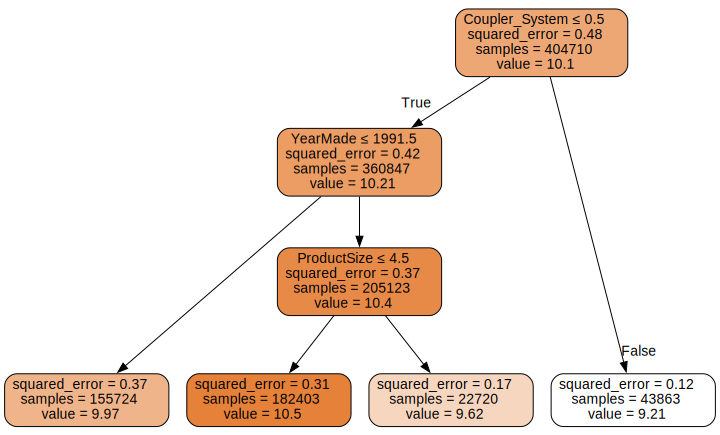

In [36]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/home/imtiaz/mambaforge/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


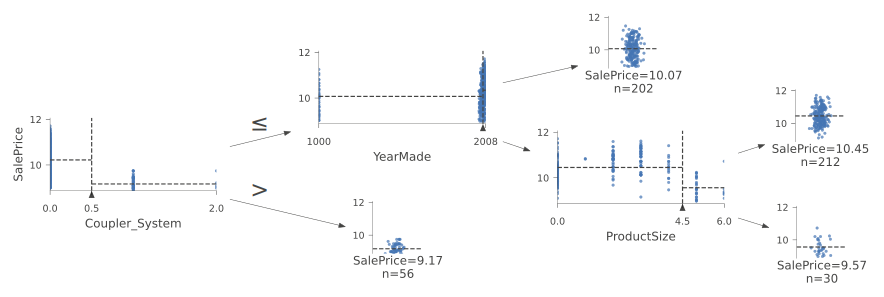

In [37]:
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m,X_train=xs.iloc[samp_idx],y_train=y.iloc[samp_idx],feature_names=xs.columns,target_name=dep_var)
viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,orientation='LR')

/home/imtiaz/mambaforge/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


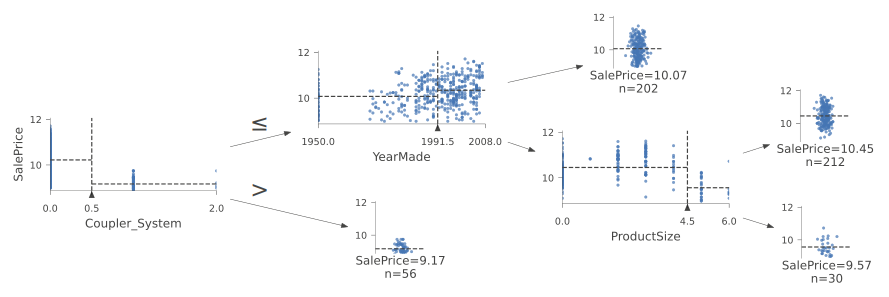

In [38]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)
viz_model=dtreeviz.model(m,X_train=xs.iloc[samp_idx],y_train=y.iloc[samp_idx],feature_names=xs.columns,target_name=dep_var)
viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,orientation='LR')

In [39]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [40]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [41]:
m_rmse(m, xs, y)

0.0

In [42]:
m_rmse(m, valid_xs, valid_y)

0.334935

In [43]:
m.get_n_leaves(), len(xs)

(324560, 404710)

We've got nearly as many leaf nodes as data points! That seems a little over-enthusiastic. Indeed, sklearn's default settings allow it to continue splitting nodes until there is only one item in each leaf node. Let's change the stopping rule to tell sklearn to ensure every leaf node contains at least 25 auction records:

In [44]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248593, 0.323339)

In [45]:
m.get_n_leaves()

12397

In [46]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [47]:
m = rf(xs, y);

In [48]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.170966, 0.232699)

In [49]:
%%capture
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [50]:
print(r_mse(preds.mean(0), valid_y))

0.232699


Let's see what happens to the RMSE as we add more and more trees. As you can see, the improvement levels off quite a bit after around 30 trees:

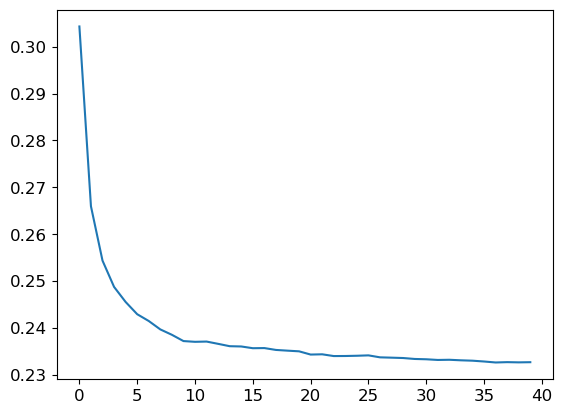

In [51]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

The performance on our validation set is worse than on our training set. But is that because we're overfitting, or because the validation set covers a different time period, or a bit of both? With the existing information we've seen, we can't tell. However, random forests have a very clever trick called *out-of-bag* (OOB) error that can help us with this (and more!).

Recall that in a random forest, each tree is trained on a different subset of the training data. The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was not included in training. This allows us to see whether the model is overfitting, without needing a separate validation set.

In [52]:
r_mse(m.oob_prediction_, y)

0.210776

In [53]:
%%capture
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [54]:
preds.shape

(40, 7988)

In [55]:
preds_std = preds.std(0)

In [56]:
preds_std[:5]

array([0.26069358, 0.10409366, 0.09904178, 0.27184634, 0.13110276])

In [57]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [58]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.173023
6,ProductSize,0.117253
30,Coupler_System,0.117053
7,fiProductClassDesc,0.073112
54,ModelID,0.054777
65,saleElapsed,0.048835
3,fiSecondaryDesc,0.046104
31,Grouser_Tracks,0.041196
12,Enclosure,0.040495
32,Hydraulics_Flow,0.032725


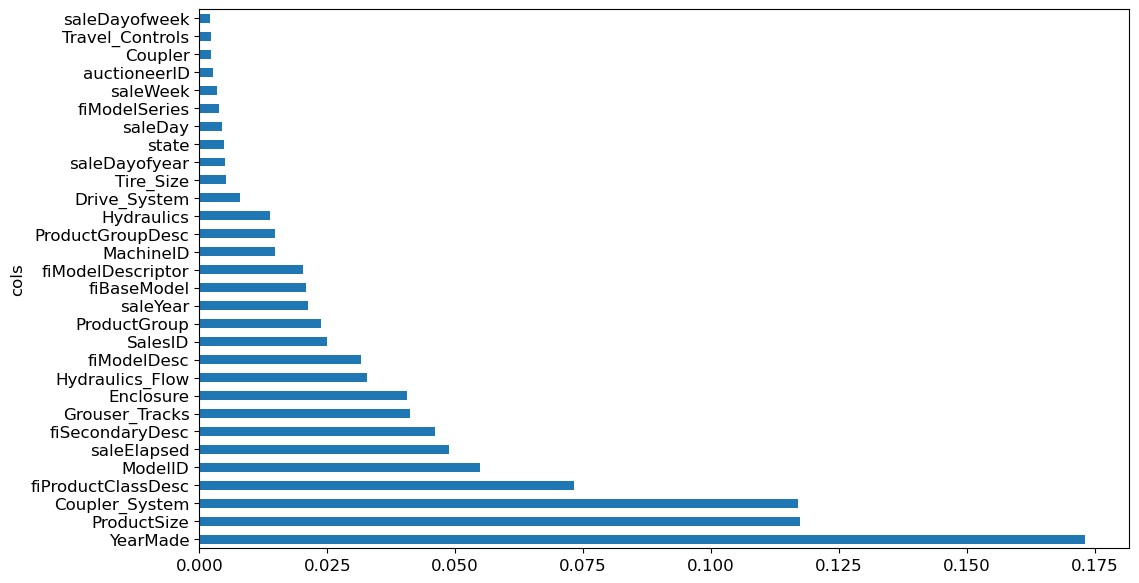

In [59]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [60]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [61]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)

In [62]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.18131, 0.230503)

In [63]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

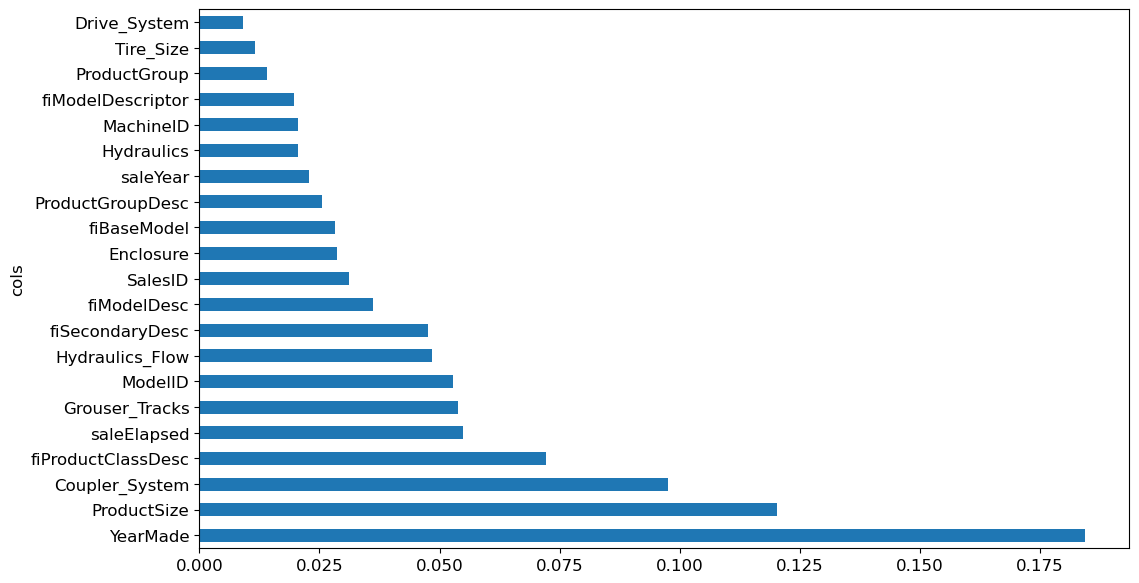

In [64]:
plot_fi(rf_feat_importance(m, xs_imp));

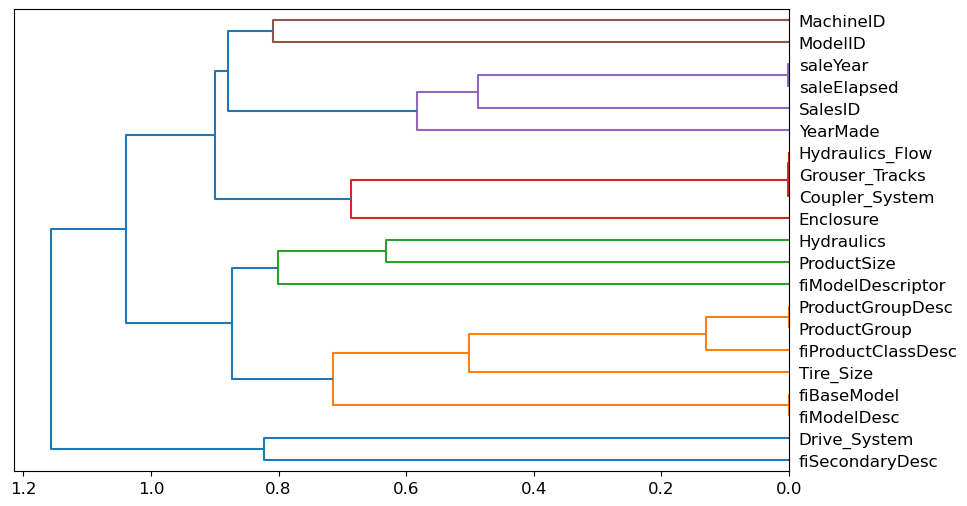

In [65]:
cluster_columns(xs_imp)

In [66]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [67]:
get_oob(xs_imp)

0.8781576734893485

In [68]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.8768628311464004,
 'saleElapsed': 0.8722097904682757,
 'ProductGroupDesc': 0.8770087512874477,
 'ProductGroup': 0.8778594920344923,
 'fiModelDesc': 0.8754781084425128,
 'fiBaseModel': 0.8761168180455399,
 'Hydraulics_Flow': 0.8774995916903535,
 'Grouser_Tracks': 0.8775565092698138,
 'Coupler_System': 0.8770165273393064}

In [69]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8750482697068109

In [70]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [71]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

In [72]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [73]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183251, 0.232259)

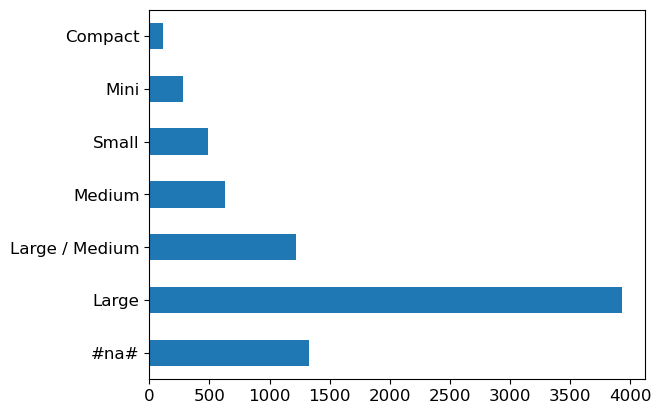

In [74]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

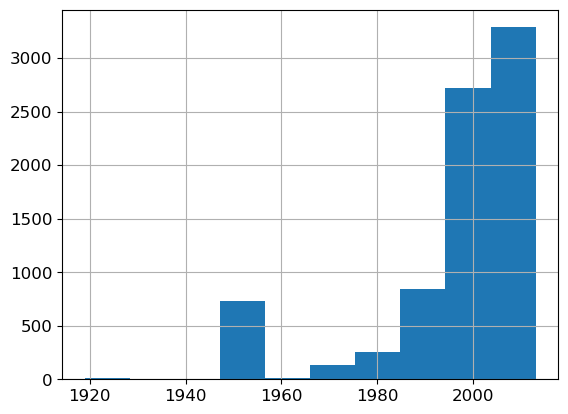

In [75]:
ax = valid_xs_final['YearMade'].hist()

Now we're ready to look at *partial dependence plots*. Partial dependence plots try to answer the question: if a row varied on nothing other than the feature in question, how would it impact the dependent variable?

For instance, how does `YearMade` impact sale price, all other things being equal?

To answer this question, we can't just take the average sale price for each `YearMade`. The problem with that approach is that many other things vary from year to year as well, such as which products are sold, how many products have air-conditioning, inflation, and so forth. So, merely averaging over all the auctions that have the same `YearMade` would also capture the effect of how every other field also changed along with `YearMade` and how that overall change affected price.

Instead, what we do is replace every single value in the `YearMade` column with 1950, and then calculate the predicted sale price for every auction, and take the average over all auctions. Then we do the same for 1951, 1952, and so forth until our final year of 2011. This isolates the effect of only `YearMade` (even if it does so by averaging over some imagined records where we assign a `YearMade` value that might never actually exist alongside some other values).

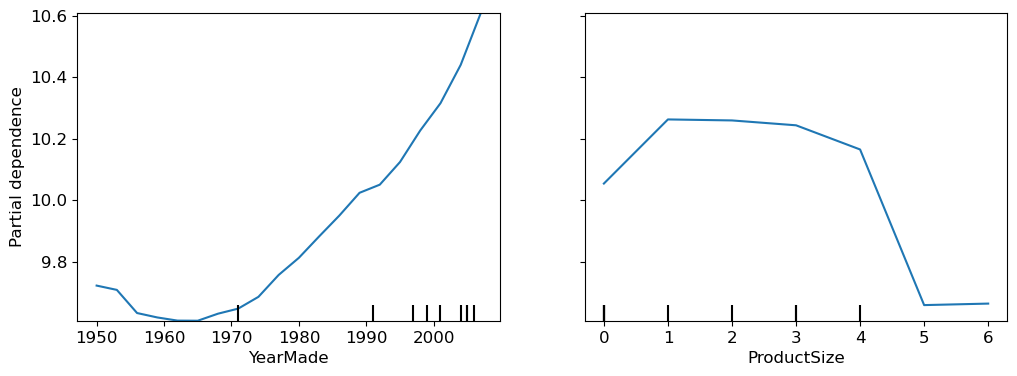

In [76]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

Looking first of all at the `YearMade` plot, and specifically at the section covering the years after 1990 (since as we noted this is where we have the most data), we can see a nearly linear relationship between year and price. Remember that our dependent variable is after taking the logarithm, so this means that in practice there is an exponential increase in price. This is what we would expect: depreciation is generally recognized as being a multiplicative factor over time, so, for a given sale date, varying year made ought to show an exponential relationship with sale price.

The `ProductSize` partial plot is a bit concerning. It shows that the final group, which we saw is for missing values, has the lowest price. To use this insight in practice, we would want to find out *why* it's missing so often, and what that *means*. Missing values can sometimes be useful predictors—it entirely depends on what causes them to be missing. Sometimes, however, they can indicate *data leakage*.

In [77]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [78]:
row = valid_xs_final.iloc[:5]
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [79]:
prediction[0], bias[0], contributions[0].sum()

(array([9.94708073]), 10.104746057831763, -0.15766532528651994)

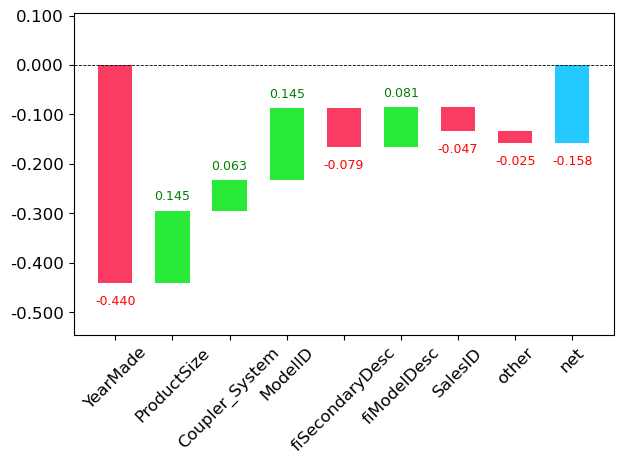

In [80]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

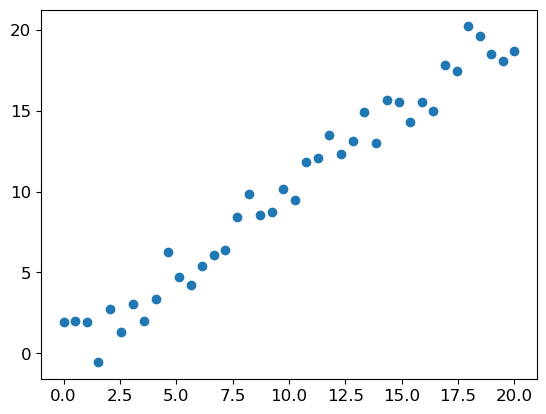

In [81]:
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [82]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [83]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

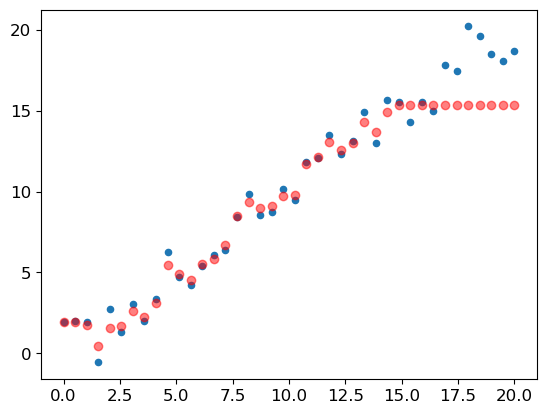

In [84]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

Sometimes it is hard to know whether your test set is distributed in the same way as your training data, or, if it is different, what columns reflect that difference. There's actually an easy way to figure this out, which is to use a random forest!

But in this case we don't use the random forest to predict our actual dependent variable. Instead, we try to predict whether a row is in the validation set or the training set. To see this in action, let's combine our training and validation sets together, create a dependent variable that represents which dataset each row comes from, build a random forest using that data, and get its feature importance:

In [85]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.883478
10,SalesID,0.099770
13,MachineID,0.011788
0,YearMade,0.001060
7,Enclosure,0.000739
4,ModelID,0.000696


In [94]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [95]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177641, 0.229086)

This shows that there are three columns that differ significantly between the training and validation sets: `saleElapsed`, `SalesID`, and `MachineID`. It's fairly obvious why this is the case for `saleElapsed`: it's the number of days between the start of the dataset and each row, so it directly encodes the date. The difference in `SalesID` suggests that identifiers for auction sales might increment over time. `MachineID` suggests something similar might be happening for individual items sold in those auctions.

Let's get a baseline of the original random forest model's RMSE, then see what the effect is of removing each of these columns in turn:

In [86]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.232239
SalesID 0.231351
saleElapsed 0.235163
MachineID 0.231336


In [87]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229657

In [88]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [89]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [90]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)
cont_nn,cat_nn

(['saleElapsed'],
 ['YearMade',
  'ProductSize',
  'Coupler_System',
  'fiProductClassDesc',
  'ModelID',
  'fiSecondaryDesc',
  'Enclosure',
  'Hydraulics_Flow',
  'fiModelDesc',
  'ProductGroup',
  'fiModelDescriptor',
  'Hydraulics',
  'Drive_System',
  'Tire_Size'])

In [91]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
Enclosure                6
Hydraulics_Flow          3
fiModelDesc           5059
ProductGroup             6
fiModelDescriptor      140
Hydraulics              12
Drive_System             4
Tire_Size               17
dtype: int64

In [96]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176921, 0.230824)

In [97]:
cat_nn.remove('fiModelDescriptor')

In [98]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [99]:
dls = to_nn.dataloaders(1024)

In [100]:
y = to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

In [101]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0002290867705596611)

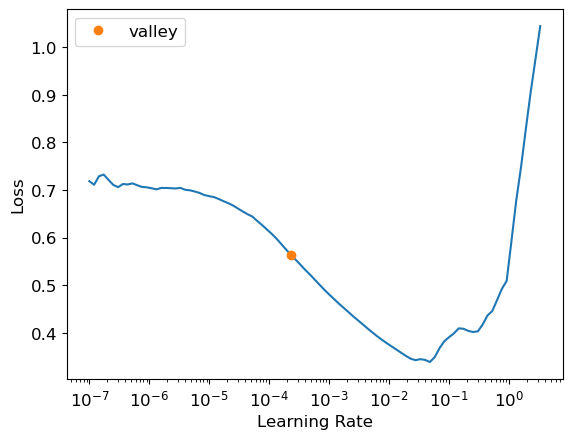

In [102]:
learn.lr_find()

In [103]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.062948,0.063153,00:04
1,0.054071,0.055439,00:06
2,0.047962,0.056841,00:05
3,0.043428,0.050956,00:04
4,0.040313,0.050722,00:04


In [104]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.225215

In [105]:
learn.save('nn')

Path('models/nn.pth')

In [106]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [107]:
r_mse(ens_preds,valid_y)

0.222152

#### chapter 10

In [1]:
from fastbook import *
from IPython.display import display,HTML

In [2]:
from fastai.text.all import *
path = untar_data(URLs.IMDB)

In [3]:
path.ls()

(#7) [Path('/home/imtiaz/.fastai/data/imdb/imdb.vocab'),Path('/home/imtiaz/.fastai/data/imdb/tmp_clas'),Path('/home/imtiaz/.fastai/data/imdb/tmp_lm'),Path('/home/imtiaz/.fastai/data/imdb/test'),Path('/home/imtiaz/.fastai/data/imdb/unsup'),Path('/home/imtiaz/.fastai/data/imdb/train'),Path('/home/imtiaz/.fastai/data/imdb/README')]

In [4]:
files = get_text_files(path, folders = ['train', 'test', 'unsup'])

In [5]:
txt = files[0].open().read(); txt[:75]
txt

"What could have been an excellent hostage movie was totally ruined by what apparently looks like a bored director ... there were so many directions that the movie could have taken ... a vampire slash-fest was not one of these!!! The last 45 mins. or so results in the movie being an absolutely ridiculous waste of time. ...and sex machine?? ... you gotta be kidding me! The acting talents of the likes of Juliette Lewis and Harvey Keitel (not to mention George Clooney) are completely wasted in this nonsensical movie. <br /><br />The director... Robert Rodriguez, known for his other gory flicks including el mariachi, desperado, once upon a time in Mexico, and the very recent sin city ... really holds your attention with the well executed first half ... which leads you to believe that you are in for an entertaining time ... but then apparently for no reason, and without any provocation, the madness starts ... there's even feeble attempts at parody and comedy ... truly exasperating!!"

In [6]:
first??

In [7]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30))

(#195) ['What','could','have','been','an','excellent','hostage','movie','was','totally','ruined','by','what','apparently','looks','like','a','bored','director','...','there','were','so','many','directions','that','the','movie','could','have'...]


In [8]:
first(spacy(['The U.S. dollar $1 is $1.00.']))

(#9) ['The','U.S.','dollar','$','1','is','$','1.00','.']

In [9]:
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

(#207) ['xxbos','xxmaj','what','could','have','been','an','excellent','hostage','movie','was','totally','ruined','by','what','apparently','looks','like','a','bored','director','…','there','were','so','many','directions','that','the','movie','could'...]


Here are some of the main special tokens you'll see:

- `xxbos`:: Indicates the beginning of a text (here, a review)
- `xxmaj`:: Indicates the next word begins with a capital (since we lowercased everything)
- `xxunk`:: Indicates the word is unknown

In [10]:
defaults.text_proc_rules

[<function fastai.text.core.fix_html(x)>,
 <function fastai.text.core.replace_rep(t)>,
 <function fastai.text.core.replace_wrep(t)>,
 <function fastai.text.core.spec_add_spaces(t)>,
 <function fastai.text.core.rm_useless_spaces(t)>,
 <function fastai.text.core.replace_all_caps(t)>,
 <function fastai.text.core.replace_maj(t)>,
 <function fastai.text.core.lowercase(t, add_bos=True, add_eos=False)>]

In addition to the *word tokenization* approach seen in the last section, another popular tokenization method is *subword tokenization*. Word tokenization relies on an assumption that spaces provide a useful separation of components of meaning in a sentence. However, this assumption is not always appropriate.

To handle these cases, it's generally best to use subword tokenization. This proceeds in two steps:

1. Analyze a corpus of documents to find the most commonly occurring groups of letters. These become the vocab.
2. Tokenize the corpus using this vocab of *subword units*.

In [11]:
txts = L(o.open().read() for o in files[:2000])

In [12]:
def subword(sz):
    sp = SubwordTokenizer(vocab_sz=sz)
    sp.setup(txts)
    return ' '.join(first(sp([txt]))[:40])

In [13]:
subword(1000)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=tmp/texts.out --vocab_size=1000 --model_prefix=tmp/spm --character_coverage=0.99999 --model_type=unigram --unk_id=9 --pad_id=-1 --bos_id=-1 --eos_id=-1 --minloglevel=2 --user_defined_symbols=▁xxunk,▁xxpad,▁xxbos,▁xxeos,▁xxfld,▁xxrep,▁xxwrep,▁xxup,▁xxmaj --hard_vocab_limit=false


'▁What ▁could ▁have ▁been ▁an ▁ex ce ll ent ▁ho st age ▁movie ▁was ▁totally ▁ ru in ed ▁by ▁what ▁a p par ent ly ▁look s ▁like ▁a ▁bo red ▁director ▁ ... ▁there ▁were ▁so ▁many ▁direction'

When using fastai's subword tokenizer, the special character `▁` represents a space character in the original text.

If we use a smaller vocab, then each token will represent fewer characters, and it will take more tokens to represent a sentence:

In [14]:
subword(200)

'▁ W h a t ▁co ul d ▁h a ve ▁be en ▁ an ▁ e x ce ll ent ▁h o st a g e ▁movie ▁was ▁to t al ly ▁ r u in ed ▁b y'

Picking a subword vocab size represents a compromise: a larger vocab means fewer tokens per sentence, which means faster training, less memory, and less state for the model to remember; but on the downside, it means larger embedding matrices, which require more data to learn.

Overall, subword tokenization provides a way to easily scale between character tokenization (i.e., using a small subword vocab) and word tokenization (i.e., using a large subword vocab), and handles every human language without needing language-specific algorithms to be developed. It can even handle other "languages" such as genomic sequences or MIDI music notation! For this reason, in the last year its popularity has soared, and it seems likely to become the most common tokenization approach (it may well already be, by the time you read this!).

In [15]:
toks = tkn(txt)
print(coll_repr(tkn(txt), 31))

(#207) ['xxbos','xxmaj','what','could','have','been','an','excellent','hostage','movie','was','totally','ruined','by','what','apparently','looks','like','a','bored','director','…','there','were','so','many','directions','that','the','movie','could'...]


In [16]:
toks200 = txts[:200].map(tkn)
toks200[0]

(#207) ['xxbos','xxmaj','what','could','have','been','an','excellent','hostage','movie'...]

In [17]:
num = Numericalize()
num.setup(toks200)
coll_repr(num.vocab,20)

'(#1952) [\'xxunk\',\'xxpad\',\'xxbos\',\'xxeos\',\'xxfld\',\'xxrep\',\'xxwrep\',\'xxup\',\'xxmaj\',\'the\',\'.\',\',\',\'a\',\'and\',\'of\',\'to\',\'it\',\'is\',\'i\',\'"\'...]'

In [18]:
nums = num(toks)[:20]; nums

TensorText([   2,    8,   60,   84,   38,   92,   61,  496,  935,   26,   23,  458,    0,   46,   60,  789,  382,   48,   12, 1441])

In [19]:
' '.join(num.vocab[o] for o in nums)

'xxbos xxmaj what could have been an excellent hostage movie was totally xxunk by what apparently looks like a bored'

In [20]:
stream = "In this chapter, we will go back over the example of classifying movie reviews we studied in chapter 1 and dig deeper under the surface. First we will look at the processing steps necessary to convert text into numbers and how to customize it. By doing this, we'll have another example of the PreProcessor used in the data block API.\nThen we will study how we build a language model and train it for a while."
tokens = tkn(stream)
bs,seq_len = 6,15
len(tokens)

90

In [21]:
# batch size is number of tokens/sequence length , in this case 90/15=6

In [22]:
d_tokens = np.array([tokens[i*seq_len:(i+1)*seq_len] for i in range(bs)])
df = pd.DataFrame(d_tokens)
display(HTML(df.to_html(index=False,header=None)))

xxbos,xxmaj,in,this,chapter,",",we,will,go,back,over,the,example,of,classifying
movie,reviews,we,studied,in,chapter,1,and,dig,deeper,under,the,surface,.,xxmaj
first,we,will,look,at,the,processing,steps,necessary,to,convert,text,into,numbers,and
how,to,customize,it,.,xxmaj,by,doing,this,",",we,'ll,have,another,example
of,the,preprocessor,used,in,the,data,block,xxup,api,.,\n,xxmaj,then,we
will,study,how,we,build,a,language,model,and,train,it,for,a,while,.


In [23]:
bs,seq_len = 6,5
d_tokens = np.array([tokens[i*15:i*15+seq_len] for i in range(bs)])
df = pd.DataFrame(d_tokens)
display(HTML(df.to_html(index=False,header=None)))

xxbos,xxmaj,in,this,chapter
movie,reviews,we,studied,in
first,we,will,look,at
how,to,customize,it,.
of,the,preprocessor,used,in
will,study,how,we,build


In [24]:
bs,seq_len = 6,5
d_tokens = np.array([tokens[i*15+seq_len:i*15+2*seq_len] for i in range(bs)])
df = pd.DataFrame(d_tokens)
display(HTML(df.to_html(index=False,header=None)))

",",we,will,go,back
chapter,1,and,dig,deeper
the,processing,steps,necessary,to
xxmaj,by,doing,this,","
the,data,block,xxup,api
a,language,model,and,train


In [25]:
bs,seq_len = 6,5
d_tokens = np.array([tokens[i*15+10:i*15+15] for i in range(bs)])
df = pd.DataFrame(d_tokens)
display(HTML(df.to_html(index=False,header=None)))

over,the,example,of,classifying
under,the,surface,.,xxmaj
convert,text,into,numbers,and
we,'ll,have,another,example
.,\n,xxmaj,then,we
it,for,a,while,.


 For instance, if the stream has 50,000 tokens and we set a batch size of 10, this will give us 10 mini-streams of 5,000 tokens. What is important is that we preserve the order of the tokens (so from 1 to 5,000 for the first mini-stream, then from 5,001 to 10,000...), because we want the model to read continuous rows of text (as in the preceding example). An `xxbos` token is added at the start of each during preprocessing, so that the model knows when it reads the stream when a new entry is beginning.


In [26]:
nums200 = toks200.map(num)

In [27]:
dl = LMDataLoader(nums200)

In [28]:
x,y = first(dl)
x.shape,y.shape

(torch.Size([64, 72]), torch.Size([64, 72]))

In [29]:
' '.join(num.vocab[o] for o in x[0][:20])

'xxbos xxmaj what could have been an excellent hostage movie was totally xxunk by what apparently looks like a bored'

In [30]:
' '.join(num.vocab[o] for o in y[0][:20])

'xxmaj what could have been an excellent hostage movie was totally xxunk by what apparently looks like a bored director'

In [31]:
get_imdb = partial(get_text_files, folders=['train', 'test', 'unsup'])

dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_imdb, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=64, seq_len=80)

In [32]:
dls_lm.show_batch(max_n=2)

,text,text_
0,"xxbos xxmaj this show has a great storyline ! xxmaj it 's very believable ! a mans wife dies and he ca nt take care of his children alone so he calls on his brother in law his best friend and many others come later on in the show . xxmaj such as xxmaj xxunk xxmaj donaldson , , the lovable yet strong dog xxmaj comet , xxmaj nikki and xxmaj alex who you can find out for yourself (","xxmaj this show has a great storyline ! xxmaj it 's very believable ! a mans wife dies and he ca nt take care of his children alone so he calls on his brother in law his best friend and many others come later on in the show . xxmaj such as xxmaj xxunk xxmaj donaldson , , the lovable yet strong dog xxmaj comet , xxmaj nikki and xxmaj alex who you can find out for yourself ( i"
1,"him to harness the beast within . xxmaj mr . xxmaj wolf then briefly shows xxmaj liu how to do it , and then asks , \n\n "" pretty cool , huh ? "" \n\n xxmaj we who have n't left the room yet are saying "" no "" , but oh boy do we still get a fun surprise . xxmaj at the end of the film , xxmaj liu xxmaj kang fights with big masculine guy ( er","to harness the beast within . xxmaj mr . xxmaj wolf then briefly shows xxmaj liu how to do it , and then asks , \n\n "" pretty cool , huh ? "" \n\n xxmaj we who have n't left the room yet are saying "" no "" , but oh boy do we still get a fun surprise . xxmaj at the end of the film , xxmaj liu xxmaj kang fights with big masculine guy ( er ,"


In [33]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

In [34]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.014030,3.918064,0.299214,50.302956,41:04


In [35]:
learn.save('1epoch')

Path('/home/imtiaz/.fastai/data/imdb/models/1epoch.pth')

In [36]:
learn = learn.load('1epoch')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.770589,3.762856,0.316937,43.071262,44:53


In [ ]:
learn.save_encoder('finetuned')

In [ ]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [ ]:
print("\n".join(preds))

In [ ]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_folder(path, vocab=dls_lm.vocab),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path, path=path, bs=64, seq_len=72)

In [ ]:
dls_clas.show_batch(max_n=3)

In [ ]:
nums_samp = toks200[:10].map(num)

In [ ]:
nums_samp.map(len)

In [ ]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [ ]:
learn = learn.load_encoder('finetuned')

In [ ]:
learn.fit_one_cycle(1, 2e-2)

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

#### chapter 11

In [ ]:
from fastbook import *
from IPython.display import display,HTML

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')